In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageFilter

In [2]:
from google.colab import files
files.upload()

Saving coins.png to coins.png


{'coins.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x00\xf6\x08\x00\x00\x00\x00I\xc4\xe5T\x00\x00\x00\x02bKGD\x00\x00\xaa\x8d#2\x00\x00\x00\tpHYs\x00\x00\x00H\x00\x00\x00H\x00F\xc9k>\x00\x00\x80\x00IDATx\xdaL\xfd\x85c[W\xd2>\x8e\xfb\xbf\xf8}\xdf\xcf\xbb\xccT\x08\x98-K\xb6e\x81\xed\xb4\xdbn\xdbm\xb7\xbb\xdd-s8\r6I\xc3\xccNb&1K\xf7^IW\xcc`f\x8c\x1d\x87\xdb4M\xca\xdc\xcd\xef\x9c\x99s\xddWI\x1c\x81-\xeb\xce\x9dy\xe6\x99g\xe6\x9c[\xb0l\xf9\xc3\xcb\x1e~x\xd9rr[\xb6\xec\xe1\xe5\xcbW\xc0\x7f+\xc9#z\x97<X\xb1b\xf9\x8a\x15+W\x90\xdb\xf2\x95+W\xac\\YHn\xe4\xeb\x8ae\xf0\x1cy\xa9\xb0h\x05\xbe@\xbf\xac\\N\x9e(\xa4O\xaf\\\xbe\x92\xbeH\x9e"O\x14\xe1;\xd0o*\\YTD\x9e\x80/\xc5EE%%\xa5%\xc5\xf4_qiI)yD\xef\x93\xbfe\xf4\x19z\xb7\x04\xbe\xa1\x94\xde\xca*\xca\xca\xcaK\xc8\xff\xe4\xe9\xb2\xb2\xd2\xb2\xf22\xfadi9\xb9_L\xbe\x8d<.\xa3O\x97\x95\xe0w\xd3\xef*%o[F\x7f\xbc\x84\xbe]QQ1}\xb7R\xfc[B\xdf\x01\xde\x88\xfc8\xfcX9\xfc4\xf9Ax\x12\xdf\x8c\xfc\xc6\x12x\xc3\xb2\xe2\xe2\x82\x87\x1e"\xb6\xa1\x

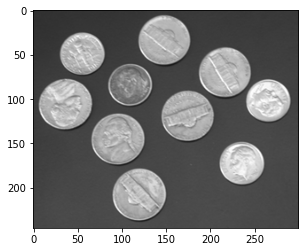

In [3]:
image = cv2.imread('coins.png')
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB)

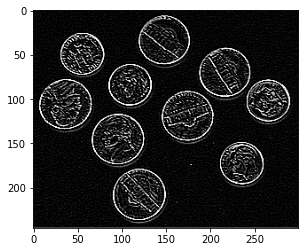

In [4]:
## IMAGE LIBRARY INBUILT FUNCTION

img_RGB = Image.open("coins.png")
# img_GREY = img_RGB.convert("LA")
# plt.imshow(img_GREY)

# laplacian kernel
final = img_RGB.filter(ImageFilter.Kernel((3, 3), (-2, -2, -2, -2, 16, -2, -2, -2, -2), 1, 0))
plt.imshow(final.convert("LA"))

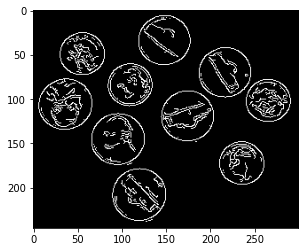

In [5]:
## OPENCV CANNY EDGE DETECTION ALGO.

img_c = cv2.imread('coins.png',0)
edges_c = cv2.Canny(img_c, 100, 200)

plt.imshow(edges_c, cmap = 'gray')

In [144]:
## STEP BY STEP PROCESS 

# sobel edge detection
def getSobelEdge(img , size=3):
    sx = cv2.Sobel(img, cv2.CV_64F,1,0,ksize=size)
    sy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=size)
    edges = np.sqrt(np.square(sx) + np.square(sy))
    edges = np.floor((edges / (np.max(edges)+ 0.001)) * 255 ).astype(np.uint8)
    return edges

# some global parameters
MEDIAN_BLUR_FILTER_SIZE = 3
EDGES_THRESHOLD = 20

# loading an image
img = cv2.imread("coins.png")

# converting an image to RGB
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# converting an image to the grayscale
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# median blurring the image
imgray = cv2.medianBlur(imgray , MEDIAN_BLUR_FILTER_SIZE)

edges = getSobelEdge(imgray , -1)

_ , mask = cv2.threshold(edges , EDGES_THRESHOLD , 255 , cv2.THRESH_BINARY )

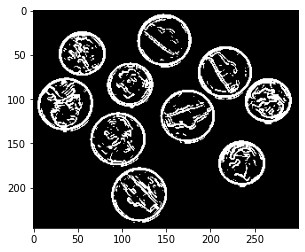

In [145]:
plt.imshow(mask, cmap = 'gray')

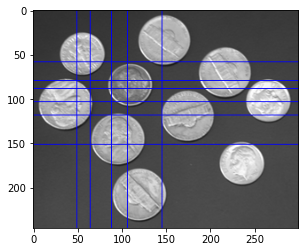

In [146]:
## HOUGH TRANSFORM


lines = cv2.HoughLines(mask, 3, np.pi/180, 150)
for l in lines:
  for rho,theta in l:
      x0 = np.cos(theta) * rho
      y0 = np.sin(theta) * rho
      x1 = int(x0 + 1000 * (-1.0 * np.sin(theta)))
      y1 = int(y0 + 1000 * (np.cos(theta)))
      x2 = int(x0 - 1000 * (-1.0 * np.sin(theta)))
      y2 = int(y0 - 1000 * (np.cos(theta)))

      if((x1 == x2) or (y1 == y2)):
        cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 1)


lines2 = cv2.HoughLines(mask, 1, np.pi/180, 100)
for l in lines2:
  for rho,theta in l:
      x0 = np.cos(theta) * rho
      y0 = np.sin(theta) * rho
      x1 = int(x0 + 1000 * (-1.0 * np.sin(theta)))
      y1 = int(y0 + 1000 * (np.cos(theta)))
      x2 = int(x0 - 1000 * (-1.0 * np.sin(theta)))
      y2 = int(y0 - 1000 * (np.cos(theta)))

      if((x1 == x2) or (y1 == y2)):
        cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 1)

plt.imshow(img)